# Arithmetics

Some properties of a dynamic reservoir may not be explicitly defined but can be derived from other properties. This can be achieved by using specific keywords in the **Eclipse E100** and **E300** syntax. These keywords can also modify property values within a specific region defined by a *box*.

**Deepfield** supports the following list of such keywords:

- **EQUALS**: Set a grid property to a constant value.
- **ADD**: Add a constant to a grid property.
- **MULTIPLY**: Multiply a grid property by a constant.
- **COPY**: Copy data from one property array to another.


In [9]:
import sys
sys.path.append('..')
from deepfield import Field
import matplotlib.pyplot as plt

Let us consider a test model where grid properties are defined explicitly with such keywords.

Let's take a look at the fragment of this model.

In [2]:
with open('../deepfield/tests/data/arithmetic_test_model/test_model.data') as f:
    t = f.readlines()
    print(''.join(t[42:63]))

PORO
    100*0.2 /

COPY
   PORO PERMX /
/
MULTIPLY
    PERMX 500 1 10 1 10 1 1  /
/
COPY
    PERMX PERMY /
    PERMX PERMZ /
/
MULTIPLY
    PERMZ 0.1 1 10 1 10 1 1  /
/

ADD
    PERMY   5   4 6 4 6 1 1 /
/




`PERMX`, `PERMY`, `PERMZ` are not defined explicitly but are set during model load.

In [3]:
model = Field('../deepfield/tests/data/arithmetic_test_model/test_model.data').load()

INFO:Field:Using default config.
INFO:Field:Start reading test_model.data
INFO:Field:[test_model.data:3] Loading TITLE
INFO:Field:[test_model.data:9] Loading START
INFO:Field:[test_model.data:13] Loading METRIC
INFO:Field:[test_model.data:14] Loading OIL
INFO:Field:[test_model.data:15] Loading WATER
INFO:Field:[test_model.data:17] Loading DIMENS
INFO:Field:[test_model.data:30] Loading DX
INFO:Field:[test_model.data:33] Loading DY
INFO:Field:[test_model.data:37] Loading DZ
INFO:Field:[test_model.data:40] Loading TOPS
INFO:Field:[test_model.data:43] Loading PORO
INFO:Field:[test_model.data:46] Loading COPY
INFO:Field:Copy rock:PORO to rock:PERMX
INFO:Field:[test_model.data:49] Loading MULTIPLY
INFO:Field:Multiply rock:PERMX by 500.0 in box [0, 10, 0, 10, 0, 1]
INFO:Field:[test_model.data:52] Loading COPY
INFO:Field:Copy rock:PERMX to rock:PERMY
INFO:Field:Copy rock:PERMX to rock:PERMZ
INFO:Field:[test_model.data:56] Loading MULTIPLY
INFO:Field:Multiply rock:PERMZ by 0.1 in box [0, 10, 0,

Check loaded attributes:

In [6]:
print(f'PERMX shape: {model.rock.permx.shape}')
print(f'PERMY shape: {model.rock.permx.shape}')
print(f'PERMZ shape: {model.rock.permx.shape}')

PERMX shape: (10, 10, 1)
PERMY shape: (10, 10, 1)
PERMZ shape: (10, 10, 1)


Check the effect of `ADD` keyword.

In [7]:
print(''.join(t[59:63]))

ADD
    PERMY   5   4 6 4 6 1 1 /
/




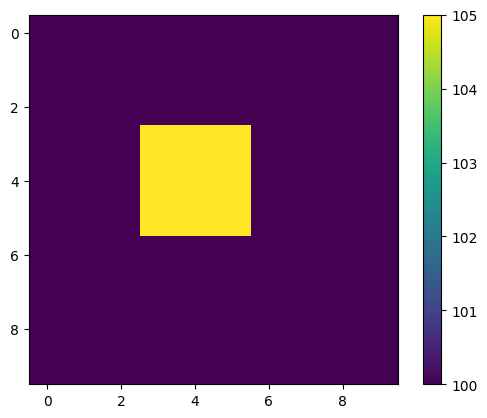

In [11]:
plt.imshow(model.rock.permy)
plt.colorbar()

We see that `PERMY` is modefied in a region defined by a box [4:6, 4:6, 1:1]. 

Done!